## kc house price predection

kcc eyeltinde ev fiyatlarına ait veri seti bir regresyon modeli gelştirmek için yapılmıştır. ev fiyatı tahmin edecez. tr de geçerli değildir. evde denemeyin

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score

In [36]:
import warnings
warnings.filterwarnings('ignore')

veri seti yükleme

In [37]:
df= pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [38]:
df.sample(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20042,1926059039,20141006T000000,799950.0,4,2.50,3320,7429,2.0,0,0,...,9,3320,0,2014,0,98034,47.7189,-122.225,1840,7429
4382,5422560900,20140807T000000,450000.0,3,2.25,1960,6500,2.0,0,0,...,8,1960,0,1977,0,98052,47.6642,-122.129,1860,6160
18020,6648760150,20140728T000000,315000.0,3,2.50,1600,7982,2.0,0,0,...,8,1600,0,1993,0,98001,47.3397,-122.266,1890,9830
20949,6163900628,20140516T000000,379950.0,3,3.25,1860,1787,3.0,0,0,...,8,1860,0,2007,0,98155,47.7563,-122.316,1830,1787
9951,1274500700,20150421T000000,237200.0,3,1.50,1220,9000,1.0,0,0,...,7,1220,0,1968,0,98042,47.3642,-122.109,1220,9472
15456,8856000545,20140507T000000,100000.0,2,1.00,910,22000,1.0,0,0,...,6,910,0,1956,0,98001,47.2777,-122.252,1326,9891
10416,1827200135,20140523T000000,554820.0,4,2.00,3510,12905,1.0,0,2,...,8,2210,1300,1965,1982,98166,47.4466,-122.360,2530,16143


In [39]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [40]:
df.drop(['date'], axis=1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [89]:
df2=df.copy()

In [116]:
df_cor= df2.drop(['id', 'date'], axis=1)
df_cor.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [91]:
df['bathrooms'].max()

8.0

<Axes: >

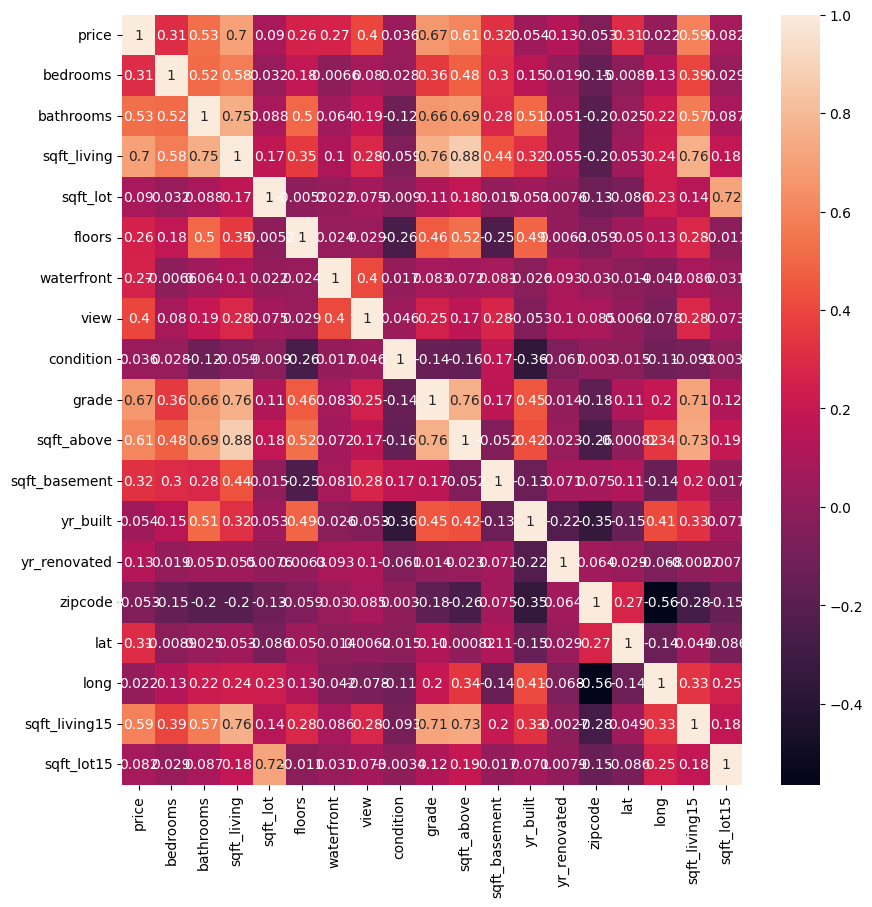

In [117]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cor.corr(), annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

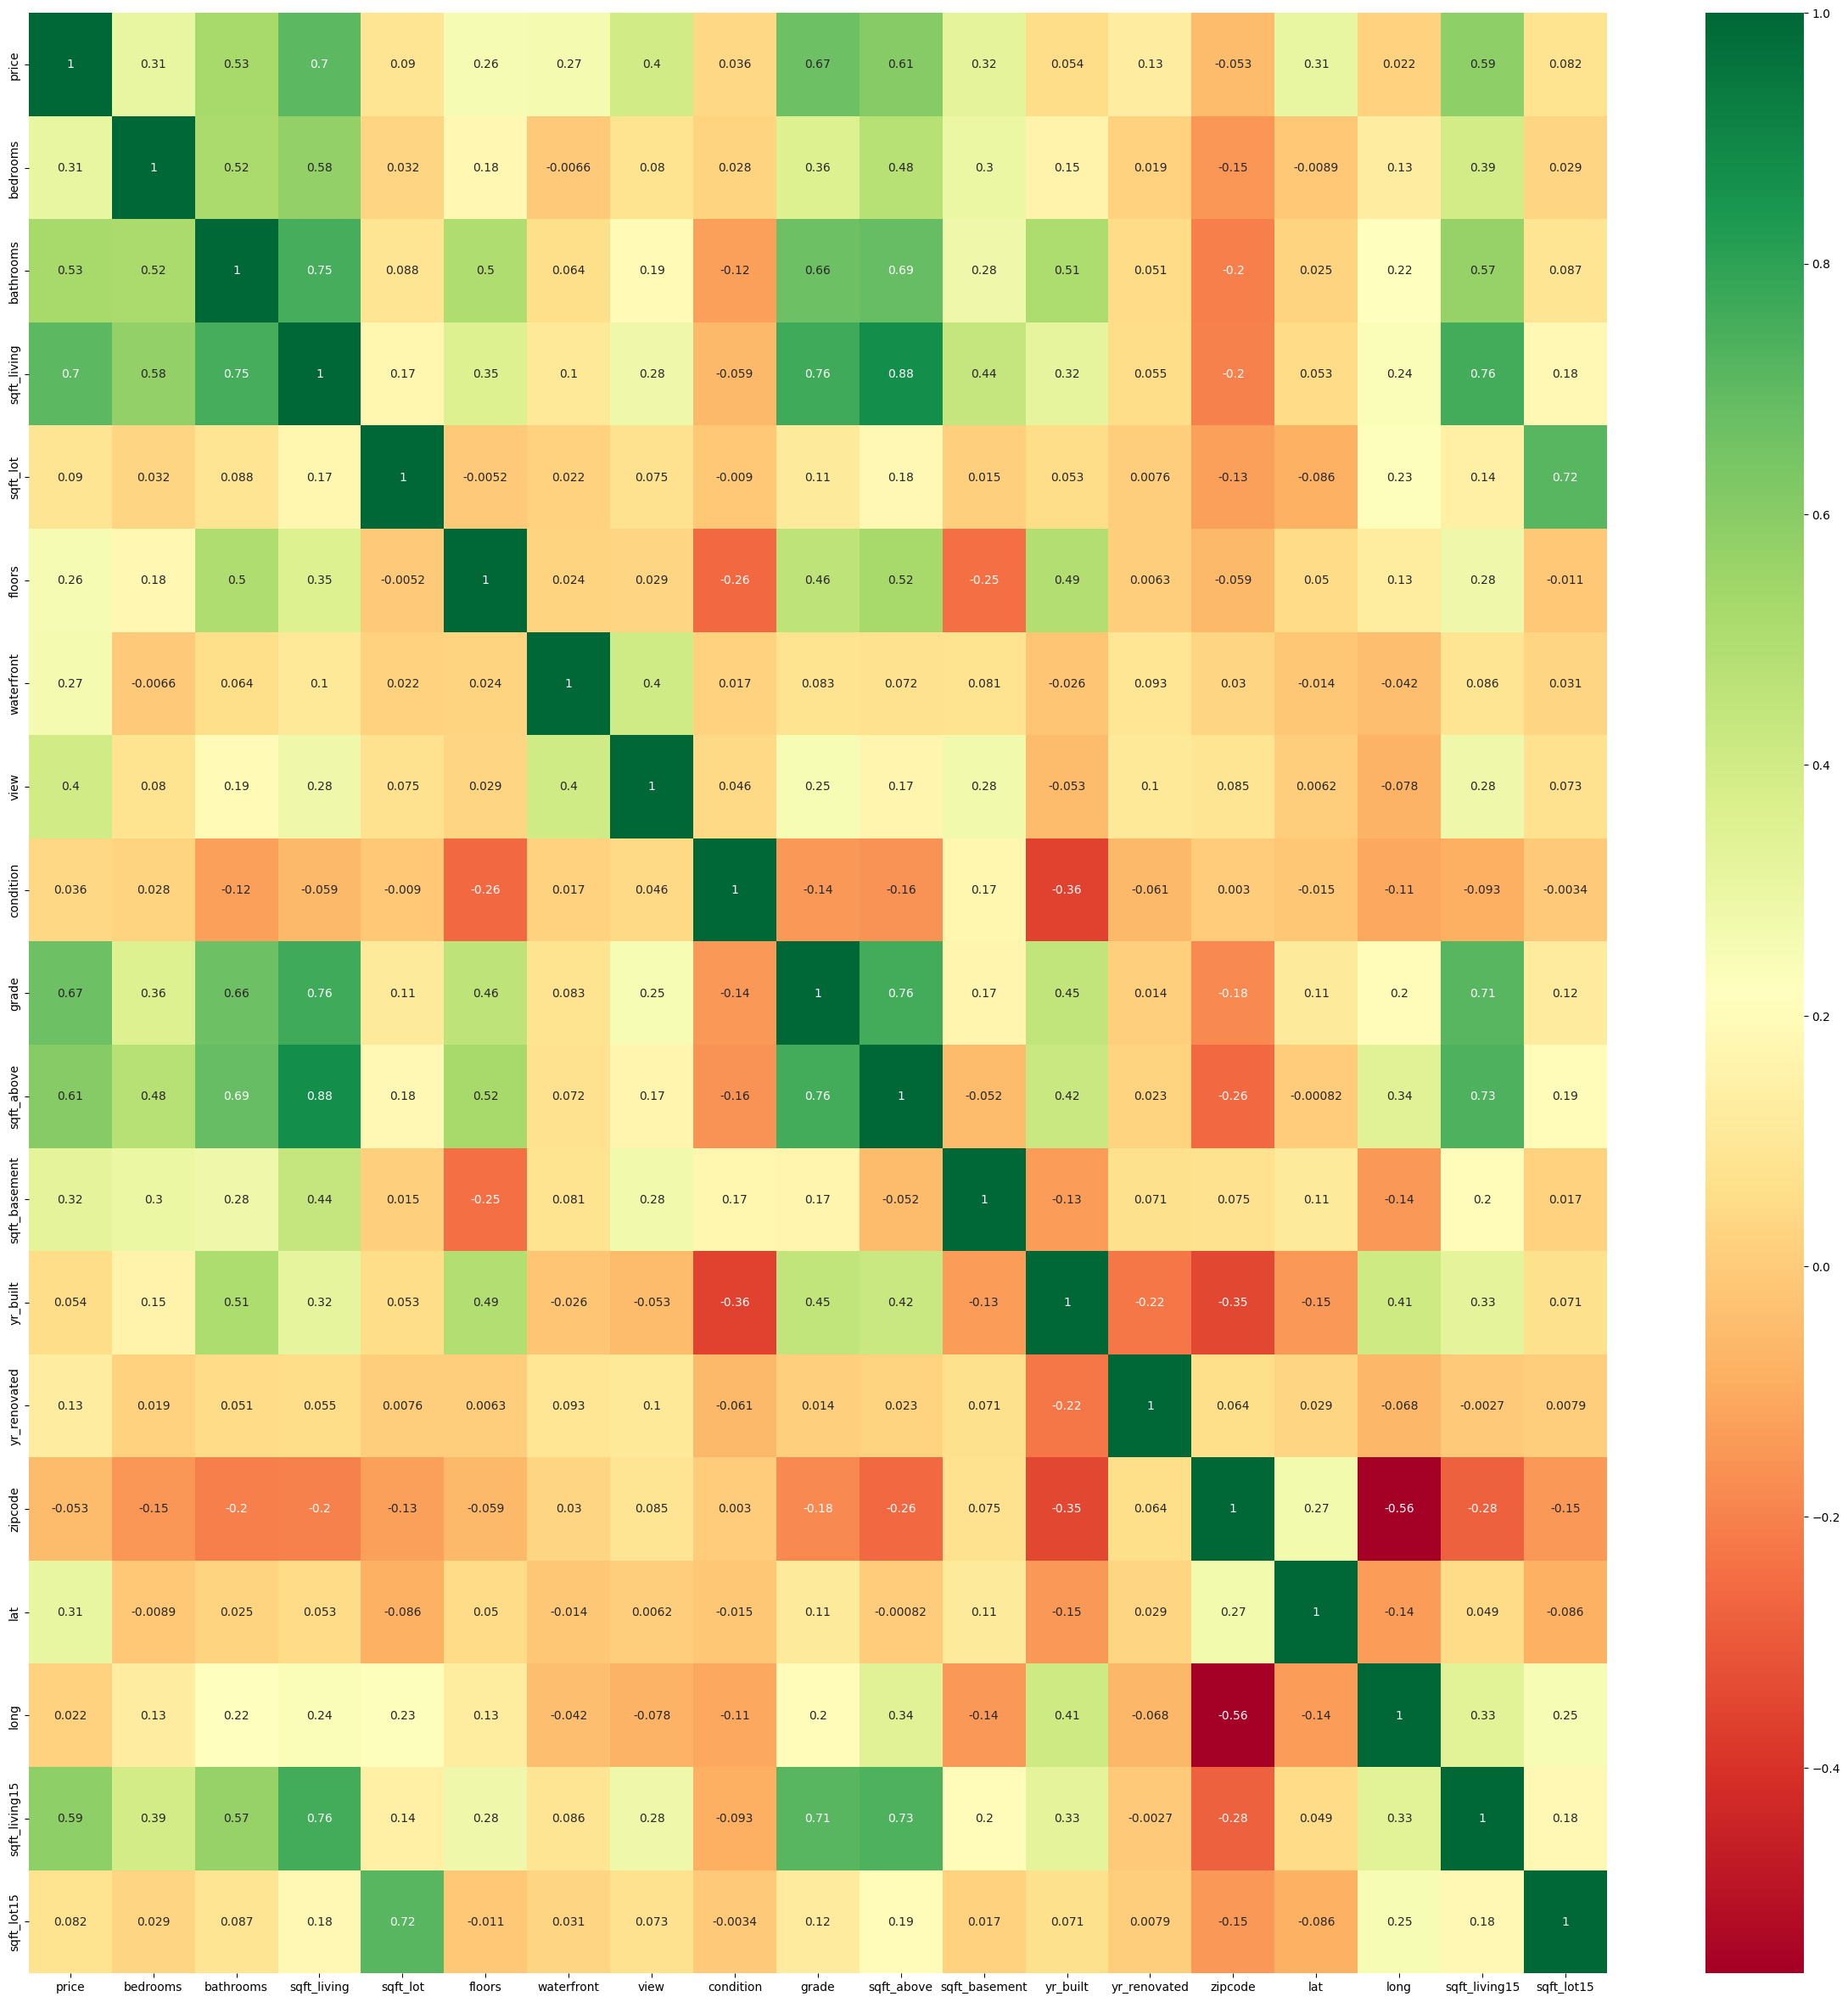

In [118]:
plt.figure(figsize=(30,30))
sns.heatmap(df_cor.corr(), annot=True, cmap='RdYlGn')
plt.show

In [119]:
abs(df_cor.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
Name: price, dtype: float64

In [95]:
df['bedrooms'].mean()

3.37084162309721

In [96]:
threshold = df2['bedrooms'].mean() + 3 * df2['bedrooms'].std()
df_bed_out = df2[df2['bedrooms'] > threshold]
print(df_bed_out)

               id             date      price  bedrooms  bathrooms  \
556    5486800070  20140620T000000  1950000.0         7       3.50   
1135   4024100951  20150105T000000   420000.0         7       3.00   
1241   7227802030  20140623T000000   350000.0         7       3.00   
1660   9126101740  20141204T000000   490000.0         8       5.00   
3721   5451100490  20150115T000000   884900.0         7       4.75   
...           ...              ...        ...       ...        ...   
18823  4040500100  20141020T000000   539000.0         7       2.25   
18975  1778360150  20140620T000000  1240000.0         7       5.50   
19254  8812401450  20141229T000000   660000.0        10       3.00   
19302  3756900027  20141125T000000   575000.0         8       3.00   
19327  2771604190  20140617T000000   824000.0         7       4.25   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
556           4640     15235     2.0           0     1  ...     11   
1135          2940 

In [97]:
df_bed_out_min=df2[df2['bedrooms']<(df2['bedrooms'].mean()-3*df2['bedrooms'].std())]


In [98]:
len(df_bed_out_min)

13

<Axes: ylabel='bedrooms'>

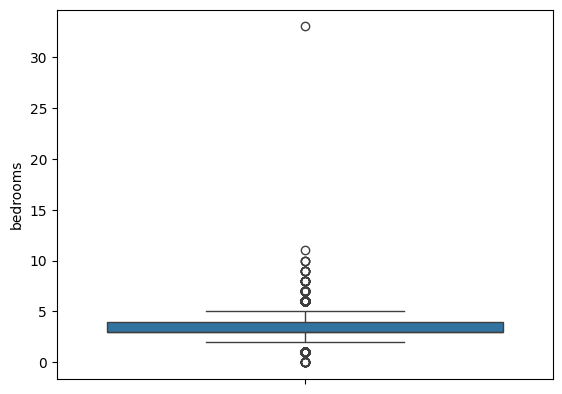

In [99]:
sns.boxplot(y=df['bedrooms'])

In [104]:
outliers=df_cor.quantile(.97)
print(outliers)

price            1.388000e+06
bedrooms         5.000000e+00
bathrooms        3.500000e+00
sqft_living      4.140000e+03
sqft_lot         6.743684e+04
floors           2.500000e+00
waterfront       0.000000e+00
view             3.000000e+00
condition        5.000000e+00
grade            1.000000e+01
sqft_above       3.700000e+03
sqft_basement    1.340000e+03
yr_built         2.013000e+03
yr_renovated     1.989000e+03
zipcode          9.818800e+04
lat              4.776206e+01
long            -1.219040e+02
sqft_living15    3.560000e+03
sqft_lot15       5.140000e+04
Name: 0.97, dtype: float64


In [105]:
df3=df2[df2['price']<outliers['price']]
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [106]:
df3['price'].max()

1387800.0

In [120]:
df3['bedrooms'].max()

33

In [121]:
df3[df3["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [122]:
df4=df3[df3['bedrooms']<outliers['bedrooms']]
df4['bedrooms'].max()

4

In [123]:
df4['price'].max()

1387800.0

In [124]:
df5=df4[df4['sqft_living']<outliers['sqft_living']]

In [125]:
df6=df4[df4['bathrooms']<outliers['bathrooms']]

In [126]:
df6.shape # satır ve sütun sayıları

(18605, 21)

In [128]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18605 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18605 non-null  int64  
 1   date           18605 non-null  object 
 2   price          18605 non-null  float64
 3   bedrooms       18605 non-null  int64  
 4   bathrooms      18605 non-null  float64
 5   sqft_living    18605 non-null  int64  
 6   sqft_lot       18605 non-null  int64  
 7   floors         18605 non-null  float64
 8   waterfront     18605 non-null  int64  
 9   view           18605 non-null  int64  
 10  condition      18605 non-null  int64  
 11  grade          18605 non-null  int64  
 12  sqft_above     18605 non-null  int64  
 13  sqft_basement  18605 non-null  int64  
 14  yr_built       18605 non-null  int64  
 15  yr_renovated   18605 non-null  int64  
 16  zipcode        18605 non-null  int64  
 17  lat            18605 non-null  float64
 18  long       

<Axes: xlabel='price', ylabel='Count'>

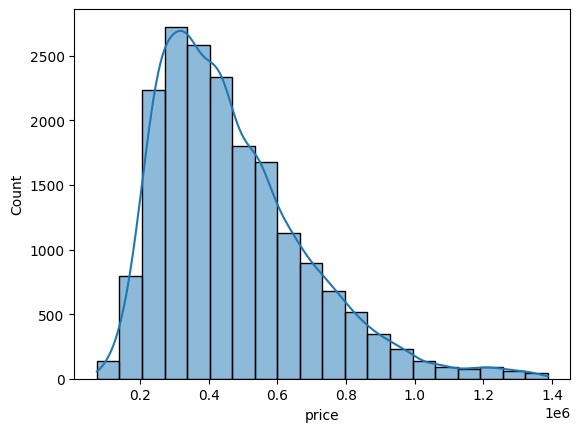

In [127]:
sns.histplot(x=df6['price'], bins=20, kde=True)

In [129]:
import datetime 


In [132]:
df6['zipcode']=df6['zipcode'].astype('category')

In [133]:
df6['zipcode'].dtype

CategoricalDtype(categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008,
                  98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027,
                  98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
                  98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056,
                  98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
                  98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109,
                  98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125,
                  98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166,
                  98168, 98177, 98178, 98188, 98198, 98199],
, ordered=False, categories_dtype=int64)

In [135]:
df6['zipcode'].nunique

<bound method IndexOpsMixin.nunique of 0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 18605, dtype: category
Categories (70, int64): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]>

In [136]:
df6['bedrooms']=df6['bedrooms']**2

In [149]:
df6['bedrooms'].max()

16

In [159]:
df6['bathrooms']=df6['bathrooms']**2

In [160]:
df6['bathrooms'].max()

1.1018955028575746e+131

In [161]:
df6['sqft_living']=df6['sqft_living']**2

In [177]:
#df6['age']=datetime.datetime.now().year-df['yr_built']
#veri tabanı 2015 e kadar
df6['age']=2015-df6['yr_built']

In [178]:
df6['age']

0        60
1        64
2        82
3        50
4        28
         ..
21608     6
21609     1
21610     6
21611    11
21612     7
Name: age, Length: 18605, dtype: int64

In [179]:
df6.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18605 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             18605 non-null  int64   
 1   date           18605 non-null  object  
 2   price          18605 non-null  float64 
 3   bedrooms       18605 non-null  int64   
 4   bathrooms      18605 non-null  float64 
 5   sqft_living    18605 non-null  int64   
 6   sqft_lot       18605 non-null  int64   
 7   floors         18605 non-null  float64 
 8   waterfront     18605 non-null  int64   
 9   view           18605 non-null  int64   
 10  condition      18605 non-null  int64   
 11  grade          18605 non-null  int64   
 12  sqft_above     18605 non-null  int64   
 13  sqft_basement  18605 non-null  int64   
 14  yr_built       18605 non-null  int64   
 15  yr_renovated   18605 non-null  int64   
 16  zipcode        18605 non-null  category
 17  lat            18605 non-null  float

In [180]:
df6['age'].describe()

count    18605.000000
mean        44.987584
std         29.059922
min          0.000000
25%         21.000000
50%         42.000000
75%         65.000000
max        115.000000
Name: age, dtype: float64

In [183]:
df6['yr_renovated']=np.where(df6['yr_renovated']==0,0,1) #güzel kullanım yaz bunu. sıfır ise sıfır değilse 1


In [184]:
df6['yr_renovated']

0        0
1        1
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: yr_renovated, Length: 18605, dtype: int32

In [185]:
df6.shape

(18605, 22)

In [186]:
df6['sqft_basement']=np.where(df6['sqft_basement']==0,0,1)


In [187]:
y=df6['price']

In [191]:
X=df6.drop(['price','date','id','lat','long'], axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,age
0,9,1.000000e+00,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,60
1,9,1.441201e+90,6604900,7242,2.0,0,0,3,7,2170,1,1951,1,98125,1690,7639,64
2,4,1.000000e+00,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,82
3,16,1.390085e+122,3841600,5000,1.0,0,0,5,7,1050,1,1965,0,98136,1360,5000,50
4,9,1.157921e+77,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,9,7.458341e+101,2340900,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,6
21609,16,7.458341e+101,5336100,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,1
21610,4,1.036772e-32,1040400,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,6
21611,9,7.458341e+101,2560000,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,11


In [192]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,age
0,9,1.000000e+00,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,60
1,9,1.441201e+90,6604900,7242,2.0,0,0,3,7,2170,1,1951,1,98125,1690,7639,64
2,4,1.000000e+00,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,82
3,16,1.390085e+122,3841600,5000,1.0,0,0,5,7,1050,1,1965,0,98136,1360,5000,50
4,9,1.157921e+77,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,28


In [193]:
y.head

<bound method NDFrame.head of 0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 18605, dtype: float64>

In [194]:
#dummies
X=pd.get_dummies(X,columns=['zipcode'], drop_first=True)

In [195]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=.2, random_state=42)

## modelleme


In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [202]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [203]:
# defined Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

In [204]:
def modelling(model, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        # Training Model
        model.fit(X_train, y_train)
        # predict test data
        predictions = model.predict(X_test)
        # Calculation of Metrics
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        # save results
        results[name] = (mse, rmse, r2)
        # Sonuçları yazdırma
    for name, (mse, rmse, r2) in results.items():
        print(f"{name}: Average RMSE: {rmse:.2f}")
        print(f"{name}: R2: {r2:.2f}")
        print("-" * 50)
    # BEST MODEL
    best_model_name = min(results, key=lambda x: results[x][0])
    best_model_mse, best_model_rmse, best_model_r2 = results[best_model_name]
    print(f"\nBest Performing Model: {best_model_name} with Average RMSE: {best_model_rmse:.2f} and R2: {best_model_r2:.2f}")

In [205]:
modelling(models, X_train_scaled, y_train, X_test_scaled, y_test)

Linear Regression: Average RMSE: 95862.19
Linear Regression: R2: 0.81
--------------------------------------------------
Decision Tree: Average RMSE: 141613.37
Decision Tree: R2: 0.59
--------------------------------------------------
Ridge: Average RMSE: 95837.71
Ridge: R2: 0.81
--------------------------------------------------
Lasso: Average RMSE: 95840.60
Lasso: R2: 0.81
--------------------------------------------------
ElasticNet: Average RMSE: 108203.48
ElasticNet: R2: 0.76
--------------------------------------------------

Best Performing Model: Ridge with Average RMSE: 95837.71 and R2: 0.81
